In [5]:
#linear regression model that explains the relationship of a cars's mileage (mpg) with its other attributes 

In [52]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('auto-mpg.csv')

In [11]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
data=data.drop('car name',axis=1)

In [13]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
data['origin'] = data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [15]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [16]:
data =pd.get_dummies(data,columns=['origin'])

In [17]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [18]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0
397,31.0,4,119.0,82,2720,19.4,82,1,0,0


In [19]:
data = data.drop('origin_europe',axis=1)

In [20]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0
394,44.0,4,97.0,52,2130,24.6,82,0,0
395,32.0,4,135.0,84,2295,11.6,82,1,0
396,28.0,4,120.0,79,2625,18.6,82,1,0


In [21]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


In [22]:
data.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
dtype: object

In [23]:
hpIsDigit =  pd.DataFrame(data.horsepower.str.isdigit())

In [24]:
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
32,25.0,4,98.0,?,2046,19.0,71,1,0
126,21.0,6,200.0,?,2875,17.0,74,1,0
330,40.9,4,85.0,?,1835,17.3,80,0,0
336,23.6,4,140.0,?,2905,14.3,80,1,0
354,34.5,4,100.0,?,2320,15.8,81,0,0
374,23.0,4,151.0,?,3035,20.5,82,1,0


In [25]:
from pandas import DataFrame
data=data.replace('?',np.nan)
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
32,25.0,4,98.0,NaN,2046,19.0,71,1,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0


In [26]:
data.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
dtype: float64

In [27]:
data=data.replace('np.nan',93.5)

In [28]:
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
32,25.0,4,98.0,NaN,2046,19.0,71,1,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0


In [29]:
medianFiller = lambda x: x .fillna(x.median())
data = data.apply(medianFiller,axis=0)
data['horsepower']=data['horsepower'].astype('float64')

In [30]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0


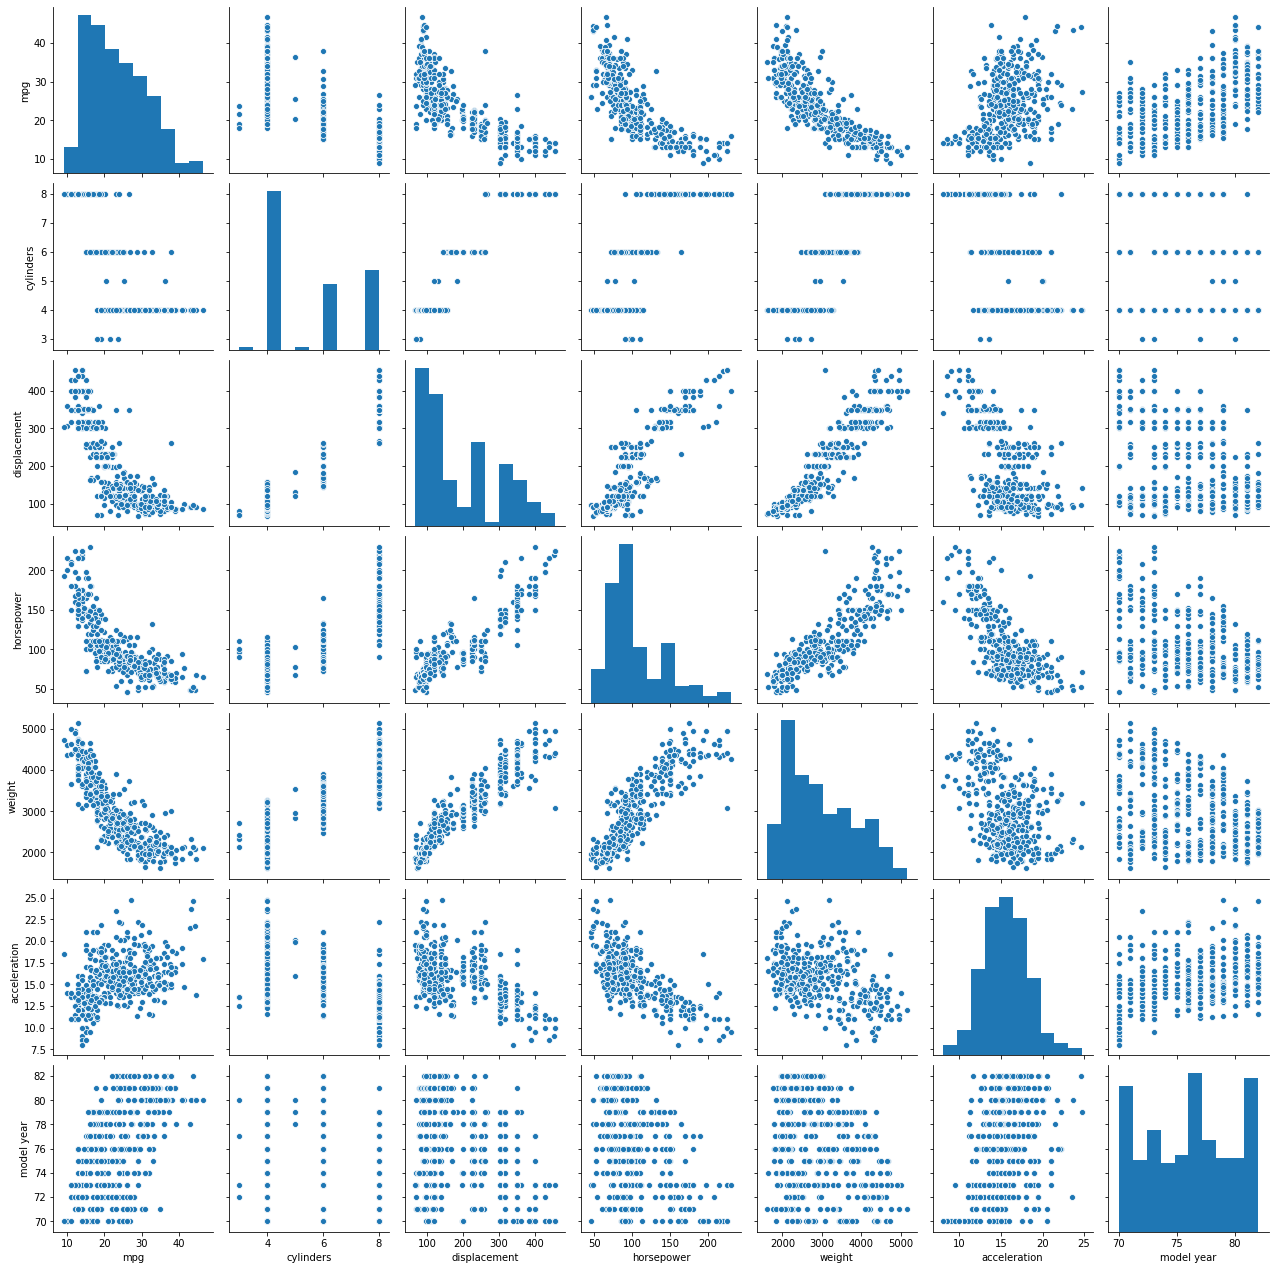

In [53]:
data_attr = data.iloc[:,0:7]
sns.pairplot(data_attr)

In [32]:
x=data.drop(['mpg'],axis=1)

In [33]:
y=data[['mpg']]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [35]:
regressionmodel = LinearRegression()
regressionmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
for idx,col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {} '.format (col_name,regressionmodel.coef_[0][idx]))

The coefficient for cylinders is -0.39480796616482666 
The coefficient for displacement is 0.028945510765487466 
The coefficient for horsepower is -0.02175220772354736 
The coefficient for weight is -0.00735203206514735 
The coefficient for acceleration is 0.06191936600761837 
The coefficient for model year is 0.8369338917645005 
The coefficient for origin_america is -3.0012830009185136 
The coefficient for origin_asia is -0.6060179643247388 


In [37]:
intercept = regressionmodel.intercept_[0]
print('the intercept for our model is {}'.format(intercept))

the intercept for our model is -18.28345111637213


In [38]:
regressionmodel.score(x_train,y_train)

0.8141025501610559

In [39]:
regressionmodel.score(x_test, y_test)

0.8433135132808827

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [46]:
poly = PolynomialFeatures(degree=2,interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2, y_train)
y_pred = poly_clf.predict(x_test2)
print(poly_clf.score(x_train2,y_train))

0.9015975293463855


In [47]:
print(poly_clf.score(x_test2,y_test))

0.8647441061366246


In [49]:
print(x_train.shape)
print(x_train2.shape)

(278, 8)
(278, 37)


In [51]:
#polynomial feature have improved the out of sample R^2.However at the cost of increasing the number of variables significently 